We have clearly that changing w impacts the shape of the distribution of probabilities for schmidt states in the energy eigenspace. (look in other spectrums like the environemnt self interaction hamiltonian?)

We try here to understand this behavior. 

We need a measure of the difference in shape. but what about the shape do we care about. We are not sure, so here is a lits of things that maybe we care about: 

-If they are defined in the same energy eigenstates (likely), but if so how much does this weight match! (maybe some normalized sum of pi/pi')

-How wide is the middle section? ie how spread out is the distribution? (maybe fitting a curve to and getting parameters from it. What kind of curve do we expect?)

-


In [31]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image

from scipy.spatial import distance



In [21]:
def probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,EI,w):
    prob_list1 = []
    prob_list2 = []
    for idx in range(len(tlist)-1):
        state = compute_schmidt_full(result,idx+1,1)
        state2 = compute_schmidt_full(result,idx+1,2)
        energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        prob_list1.append(energy_coeff)
        prob_list2.append(energy_coeff2)
    return prob_list1, prob_list2


In [22]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.1# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

In [23]:
s1_list,s2_list=probs_schmidt_in_energy_eigenstates(result,eigenenergies_total,eigenstates_total,tlist,EI,w)

First thing we try is to define a function that calculates a metric of similarity between the 2 distributions.

2 ideas: 

Use the cosine distance
Use the sum of f(pi/pi') (prob of schmidt 1 being in eigenstate i/...schmidt 2...) with f a function that keeps it between 0 and 1, like the sigmoid.

The idea with the cosine, is to make a vector out of the 2 distributions and project them on each other.  


In [34]:
#need to that the schmidt states become stable over time
#to do that, we get a list of ss[0] vectors over time and check that as timer goes, they change less and less.

def similarity_btw_s1_s2_plot(s1_list,s2_list,tlist):
    similarities = []
    for idx in range(len(tlist)-1):
        d = 1-distance.cosine(s1_list[idx], s2_list[idx])
        similarities.append(d)
    
    plt.plot(tlist[0:len(tlist)-1], similarities)

    return similarities
# Plot the similarity over time
#plt.plot(tlist[0:len(tlist)-step], similarities)
#plt.xlabel('Time')
#plt.ylabel('Similarity')
#plt.title('Evolution of Similarity between se[0] Vectors')
#plt.show()

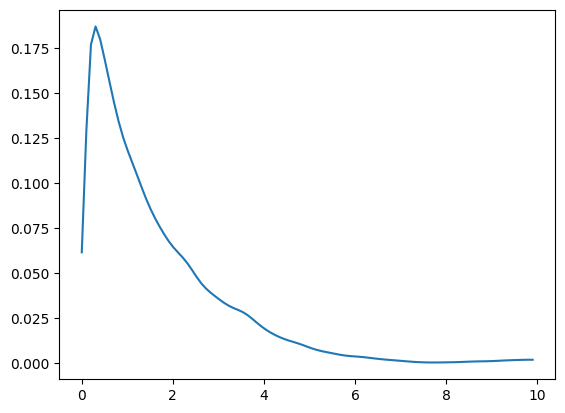

In [35]:
similarities_btw_s1_s2 = similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)